In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [12]:
# Data
data16ues = {
    'Process': ['RF Env. Man. Connection', 'E2Node Connection', 'xApp Monitoring', 'Prometheus', 'Vespa Manager', 'Ves Collector', 'Kafka', 'rApp Energy Savings', 'xApp Handover', 'E2Node Handover', 'RF Env. Man. Handover'],
    'Mean': [0.0003, 0.0003, 0.000155, 1.83, 4.332, 1.324148, 0.722, 1.12632, 0.01734537782, 0.018, 0.05],
    'Std Dev': [0.00001, 0.00001, 0.0001674315781, 0.2, 0.3, 0.05, 0.1, 0.39, 0.00026, 0.002, 0.005]
}

data1024ues = {
    'Process': [
        'RF Env. Man. Connection', 'E2Node Connection', 'xApp Monitoring', 
        'Prometheus', 'Vespa Manager', 'Ves Collector', 'Kafka', 
        'rApp Energy Savings', 'xApp Handover', 'E2Node Handover', 
        'RF Env. Man. Handover'
    ],
    'Mean': [
        0.03528625192, 0.03528625192, 0.01823123016, 
        215.2461367, 672, 155.7473997, 84.92224628, 
        310.2925, 2.040177904, 2.117175115, 5.881041986
    ],
    'Std Dev': [
        0.001176208397, 0.001176208397, 0.01969344281, 
        23.52416795, 46.53739612, 5.881041986, 11.76208397, 
        73.01, 0.093, 0.2352416795, 0.5881041986
    ]
}

# DataFrame
df16 = pd.DataFrame(data16ues)
df1024 = pd.DataFrame(data1024ues)

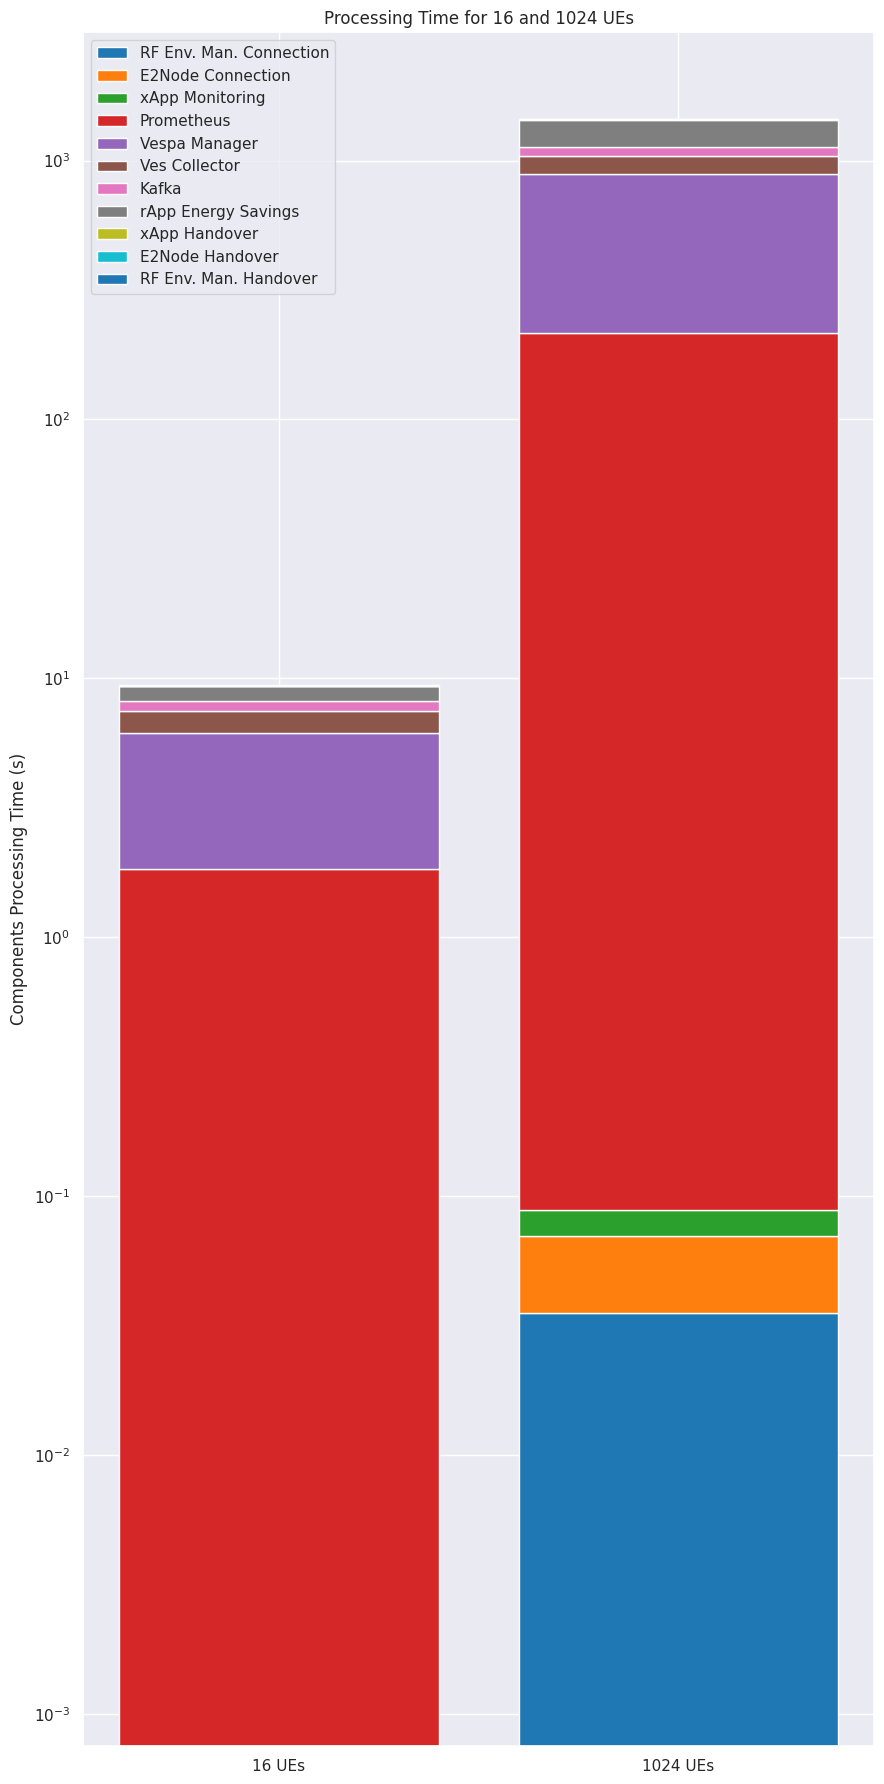

In [13]:
# Adjust data to reflect the process finish and next start for 16 UEs
df16['End'] = df16['Mean'].cumsum()
df16['Start'] = df16['End'].shift(1, fill_value=0)

# Adjust data to reflect the process finish and next start for 1024 UEs
df1024['End'] = df1024['Mean'].cumsum()
df1024['Start'] = df1024['End'].shift(1, fill_value=0)

# Set seaborn style
sns.set(style="darkgrid")

# Prepare the figure
fig, ax = plt.subplots(figsize=(9, 18))

# Colors for different processes
colors = sns.color_palette("tab10", len(df16))

# Plot for 16 UEs
bottom16 = 0
for i, row in df16.iterrows():
    ax.bar('16 UEs', row['End'] - row['Start'], bottom=bottom16, color=colors[i], label=row['Process'])
    bottom16 += row['End'] - row['Start']

# Plot for 1024 UEs
bottom1024 = 0
for i, row in df1024.iterrows():
    ax.bar('1024 UEs', row['End'] - row['Start'], bottom=bottom1024, color=colors[i])
    bottom1024 += row['End'] - row['Start']

ax.set_ylabel('Components Processing Time (s)')
ax.set_title('Processing Time for 16 and 1024 UEs')
ax.set_yscale('log')

ax.legend(loc='upper left')

# Customize the plot
plt.tight_layout()

# Save the plots
plt.savefig('out/detailed-times-stacked.pdf', bbox_inches='tight')
plt.savefig('out/detailed-times-stacked.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()